In [1]:
import torch
from torch import nn
from torch.nn import functional as F

In [2]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(5, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.tanh(x)
        x = self.fc2(x)
        return F.tanh(x)


model = MyModel()

out = model(torch.rand(5))
print(out)
print(out.shape)
print(model(torch.rand(5).unsqueeze(0)).shape)
print(model(torch.rand(5).unsqueeze(0).unsqueeze(0)).shape)

tensor([-0.1887], grad_fn=<TanhBackward0>)
torch.Size([1])
torch.Size([1, 1])
torch.Size([1, 1, 1])


In [3]:
model.fc1.state_dict()

OrderedDict([('weight',
              tensor([[ 0.3565,  0.3541, -0.3822,  0.1587,  0.0942],
                      [ 0.0980,  0.3929, -0.2194, -0.1066,  0.0625],
                      [-0.3535,  0.3207, -0.0539, -0.4247,  0.0912],
                      [-0.3637, -0.2459,  0.0212,  0.1328,  0.2579],
                      [ 0.3138,  0.1941,  0.0835, -0.0809,  0.0022],
                      [-0.2479,  0.1524,  0.2573,  0.3162, -0.3442],
                      [ 0.1345,  0.1730,  0.0407, -0.1263,  0.0327],
                      [ 0.0653, -0.1426, -0.0094, -0.3707,  0.2609],
                      [-0.1513, -0.0651,  0.1207,  0.0728, -0.2153],
                      [ 0.1627, -0.1100, -0.2881, -0.2790, -0.4089]])),
             ('bias',
              tensor([ 0.2750, -0.3668,  0.1158, -0.2813, -0.2112,  0.3921,  0.3545, -0.1897,
                      -0.1425,  0.3865]))])

In [4]:
model

MyModel(
  (fc1): Linear(in_features=5, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)

In [3]:
out.shape

torch.Size([1])

In [4]:
print(model.fc1.state_dict())


OrderedDict([('weight', tensor([[ 0.3229, -0.4006, -0.3276,  0.0394,  0.2705],
        [-0.0440, -0.0373,  0.2262, -0.0609, -0.4079],
        [-0.1262, -0.3244,  0.3307, -0.4071, -0.1682],
        [-0.0568, -0.2515, -0.0426, -0.1685, -0.1788],
        [ 0.3731, -0.3624,  0.4023,  0.3771, -0.0054],
        [-0.3493, -0.3476, -0.0532, -0.1070,  0.1893],
        [ 0.3229, -0.0508, -0.1940,  0.3586,  0.4163],
        [-0.0898,  0.1607,  0.2969, -0.0722,  0.0483],
        [-0.2208,  0.0196,  0.4325,  0.0265,  0.0429],
        [ 0.3451, -0.2929, -0.3196,  0.0557,  0.1808]])), ('bias', tensor([-0.0854,  0.0507, -0.0807,  0.2271,  0.2749,  0.0700, -0.0399, -0.2366,
        -0.2049, -0.4429]))])


In [5]:
torch.tensor(2).shape

torch.Size([])

In [6]:
isinstance(model.fc1, nn.Module)

True

In [7]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()
writer.add_graph(model, torch.rand(5))
writer.close()

In [8]:
nn.Tanh?

Init signature: nn.Tanh(*args, **kwargs) -> None
Docstring:     
Applies the Hyperbolic Tangent (Tanh) function element-wise.

Tanh is defined as:

.. math::
    \text{Tanh}(x) = \tanh(x) = \frac{\exp(x) - \exp(-x)} {\exp(x) + \exp(-x)}

Shape:
    - Input: :math:`(*)`, where :math:`*` means any number of dimensions.
    - Output: :math:`(*)`, same shape as the input.

.. image:: ../scripts/activation_images/Tanh.png

Examples::

    >>> m = nn.Tanh()
    >>> input = torch.randn(2)
    >>> output = m(input)
Init docstring: Initialize internal Module state, shared by both nn.Module and ScriptModule.
File:           ~/projects/passing_the_torch/venv/lib/python3.10/site-packages/torch/nn/modules/activation.py
Type:           type
Subclasses:     

In [9]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(5, 10)
        self.nl1 = nn.Tanh()
        self.fc2 = nn.Linear(10, 1)
        self.nl2 = nn.Tanh()

    def forward(self, x):
        x = self.fc1(x)
        x = self.nl1(x)
        x = self.fc2(x)
        return self.nl2(x)


model = MyModel()

out = model(torch.rand(5))
print(out)
print(out.shape)
print(model(torch.rand(5).unsqueeze(0)).shape)
print(model(torch.rand(5).unsqueeze(0).unsqueeze(0)).shape)

tensor([-0.2529], grad_fn=<TanhBackward0>)
torch.Size([1])
torch.Size([1, 1])
torch.Size([1, 1, 1])


In [10]:
writer = SummaryWriter()
writer.add_graph(model, torch.rand(5))
writer.close()

In [11]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1325, -0.2055, -0.2189,  0.1716, -0.3308],
         [-0.4331, -0.1121, -0.2912, -0.3995,  0.0855],
         [ 0.3599, -0.3656, -0.4179,  0.1815, -0.2171],
         [-0.3045, -0.0628,  0.1607, -0.1374, -0.1648],
         [ 0.0946, -0.1215,  0.0459,  0.0462,  0.0647],
         [ 0.3077, -0.4079, -0.3476, -0.3135,  0.2898],
         [ 0.3632,  0.0344,  0.0229, -0.0694,  0.3929],
         [-0.0029, -0.2750, -0.4247, -0.3623,  0.0433],
         [-0.0855,  0.1096,  0.1385,  0.1759, -0.2942],
         [ 0.3949,  0.1095, -0.3975,  0.2861,  0.3637]], requires_grad=True),
 Parameter containing:
 tensor([-0.1706, -0.1214,  0.1721, -0.0808,  0.1429, -0.2637, -0.0223,  0.2530,
          0.3734, -0.1103], requires_grad=True),
 Parameter containing:
 tensor([[ 0.1038,  0.2861,  0.2363, -0.0907, -0.2811,  0.0621, -0.0059, -0.1039,
           0.0057,  0.0280]], requires_grad=True),
 Parameter containing:
 tensor([-0.0445], requires_grad=True)]

In [12]:
class MyModel(nn.Module):
    def __init__(self, num_layers=3):
        super(MyModel, self).__init__()
        self.layers = []
        in_features = 5
        out_features = 10
        for _ in range(num_layers - 1):
            self.layers.append(nn.Linear(in_features, out_features))
            in_features = out_features   
        self.layers.append(nn.Linear(in_features, 1))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
            x = F.tanh(x)
        return x


model = MyModel()

In [13]:
model.state_dict()

OrderedDict()

In [14]:
model(torch.rand(5))

tensor([-0.1875], grad_fn=<TanhBackward0>)

In [15]:
class MyModel(nn.Module):
    def __init__(self, num_layers=3):
        super(MyModel, self).__init__()
        layers = []
        in_features = 5
        out_features = 10
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(in_features, out_features))
            in_features = out_features   
        layers.append(nn.Linear(in_features, 1))
        self.layers = nn.ModuleList(layers)

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
            x = F.tanh(x)
        return x


model = MyModel(2)
model.state_dict()

OrderedDict([('layers.0.weight',
              tensor([[ 0.2654,  0.1255, -0.0039, -0.0020,  0.3945],
                      [ 0.0726,  0.3842, -0.4344, -0.4215,  0.2900],
                      [-0.4399,  0.2469,  0.1869,  0.4161,  0.0117],
                      [-0.4220,  0.1272, -0.0170,  0.2213, -0.0852],
                      [ 0.3064,  0.0898, -0.4384, -0.2261,  0.2243],
                      [-0.0539, -0.0286,  0.0313, -0.1860,  0.0710],
                      [ 0.0563,  0.4322, -0.0118, -0.3821,  0.1187],
                      [ 0.2450, -0.1212,  0.3548, -0.4268, -0.2624],
                      [ 0.2025,  0.3714,  0.1190, -0.2227,  0.1994],
                      [-0.1454,  0.1359, -0.1414,  0.2444, -0.3581]])),
             ('layers.0.bias',
              tensor([ 0.4272,  0.2811,  0.2383,  0.1781, -0.0367,  0.3007, -0.0199, -0.1926,
                      -0.3994, -0.3463])),
             ('layers.1.weight',
              tensor([[ 0.0788,  0.0782,  0.1486,  0.1971, -0.1432,  0.09

In [16]:
class MyModel(nn.Module):
    def __init__(self, num_layers=3):
        super(MyModel, self).__init__()
        self.layers = nn.Sequential()
        in_features = 5
        out_features = 10
        for _ in range(num_layers - 1):
            self.layers.extend([nn.Linear(in_features, out_features), nn.Tanh()])
            in_features = out_features   
        self.layers.extend([nn.Linear(in_features, 1), nn.Tanh()])
        

    def forward(self, x):
        return self.layers(x)


model = MyModel()

In [17]:
writer = SummaryWriter()
writer.add_graph(model, torch.rand(5))
writer.close()

0.9%

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw


100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




14.8%

100.0%
100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



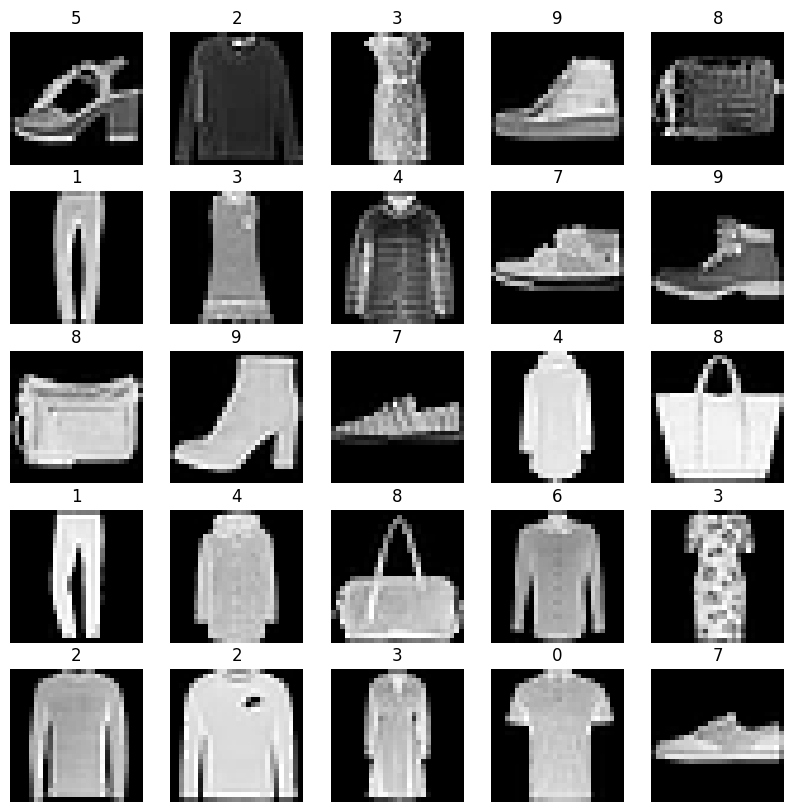

In [20]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define a transform to convert the data to tensor
transform = transforms.ToTensor()

# Download and load the training data
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=transform
)

# Download and load the test data
test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=transform
)

# Create data loaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Visualize some training data
def show_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title(labels[i].item())
        plt.axis('off')
    plt.show()

# Get a batch of training data
images, labels = next(iter(train_loader))
show_images(images, labels)


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load dataset and create DataLoader
transform = transforms.Compose([transforms.ToTensor()])
dataset = datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)
train_set, val_set = random_split(dataset, [50000, 10000])
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False)

# Initialize model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with validation
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Training Loss: {running_loss/len(train_loader):.4f}, '
          f'Validation Loss: {val_loss/len(val_loader):.4f}, '
          f'Validation Accuracy: {100 * correct / total:.2f}%')

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/5, Training Loss: 0.3167, Validation Loss: 0.1802, Validation Accuracy: 95.05%
Epoch 2/5, Training Loss: 0.1429, Validation Loss: 0.1340, Validation Accuracy: 96.14%
Epoch 3/5, Training Loss: 0.0973, Validation Loss: 0.1085, Validation Accuracy: 96.76%
Epoch 4/5, Training Loss: 0.0735, Validation Loss: 0.0969, Validation Accuracy: 96.91%
Epoch 5/5, Training Loss: 0.0562, Validation Loss: 0.0956, Validation Accuracy: 97.20%
